In [8]:
#爬取
from bs4 import BeautifulSoup 
import pandas as pd
import time
from tqdm import tqdm
import requests
import xlwt,xlrd
from xlutils.copy import copy
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.common.exceptions import NoSuchElementException 

Cookie = {'domain': '.weibo.com', 'expiry': 'session', 'httpOnly': False, 'name': 'SSOLoginState', 'path': '/', 'secure': False, 'value': '1576757068'},{'domain': 'passport.weibo.com', 'expiry': 'session', 'httpOnly': False, 'name': 'login', 'path': '/', 'secure': False, 'value': '13a0857768fc0c0abafd3d70c0f4538a'},{'domain': 'weibo.com', 'expiry': 'session', 'httpOnly': False, 'name': 'wb_view_log', 'path': '/', 'secure': False, 'value': '1440*9002'},{'domain': 'weibo.com', 'expiry': 'session', 'httpOnly': False, 'name': 'wb_view_log_3385793282', 'path': '/', 'secure': False, 'value': '1440*9002'},{'domain': '.weibo.com', 'expiry': 'session', 'httpOnly': False, 'name': '_s_tentry', 'path': '/', 'secure': False, 'value': 'login.sina.com.cn'}

options = webdriver.ChromeOptions()
options.add_argument('User-Agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36","Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3","Accept-Encoding":"gzip","Accept-Language":"zh-CN,zh;q=0.9","Cache-Control":"max-age=30","Upgrade-Insecure-Requests":"1')
prefs={'profile.default_content_setting_values': {'images': 2}}
options.add_experimental_option('prefs',prefs)
browser = webdriver.Chrome('C:/Users/LinKejing/Desktop/chromedriver.exe',options=options)
browser.set_window_size(width=710, height=1200, windowHandle="current")
browser.set_window_position(x=720, y=0)
options.add_argument("--proxy-server=http://202.20.16.82:10152")
browser.get('https://m.weibo.cn/search?containerid=100103type%3D1%26q%3D鹿晗关晓彤')  #改这个网页 


for row in tqdm(range(50),desc = '翻页'):
	browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")

Articles = ''
html_text = browser.page_source
soup = BeautifulSoup(html_text,'html.parser')
title = soup.select('#app > div > div > div > div > div > article > div > div.weibo-text')
for i in title:		
	Articles += i.get_text() + '\n'
f = open('lhandgxtwb.txt','w',encoding='utf-8')         #文件储存 记得改文件名
f.write(Articles)


翻页: 100%|██████████████████████████████████████████████████████████████████████████████| 50/50 [00:54<00:00,  1.13s/it]


33473

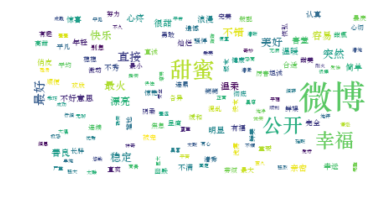

In [10]:
#切词+词云
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import jieba.posseg as pseg

text=open(r'lhandgxtwb.txt', 'r',encoding='utf-8').read().replace('\n','')
jieba.load_userdict("D:/emotion.txt")
words=jieba.posseg.cut(text)
nwords = ''
for item in words:
    if(item.flag == 'a' or item.flag == 'ad' or item.flag == 'ag' or item.flag == 'an'):
        nwords += str(item.word) + ' '
        
seg_list = jieba.lcut(nwords)
text_cut ='/'.join(seg_list)

WordCloud(font_path='C:\windows\Fonts\STZHONGS.TTF') 
wordcloud = WordCloud(background_color="white", max_font_size=40,font_path='STZHONGS.TTF').generate(text_cut)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
#词频统计
from collections import Counter
from pprint import pprint
c=Counter()
for i in nwords.split(' '):
    if len(i) > 1:
        c[i]+=1
pprint(c.most_common(30))

[('微博', 123),
 ('甜蜜', 44),
 ('公开', 34),
 ('幸福', 32),
 ('最好', 9),
 ('直接', 8),
 ('稳定', 7),
 ('突然', 7),
 ('不错', 7),
 ('快乐', 7),
 ('美好', 7),
 ('最火', 7),
 ('容易', 6),
 ('漂亮', 6),
 ('心疼', 5),
 ('很甜', 5),
 ('温柔', 5),
 ('善良', 5),
 ('亲密', 4),
 ('浪漫', 4),
 ('害羞', 4),
 ('不好意思', 4),
 ('简单', 4),
 ('明显', 4),
 ('温暖', 4),
 ('太美', 4),
 ('挺好', 3),
 ('幸运', 3),
 ('惊喜', 3),
 ('最爱', 3)]


In [12]:
sum=0
for i in c.values():
    sum+=i
print(sum)

560


In [ ]:
#认可度计算：挑出负面情绪词/sum-“微博”的词数，如突然、心疼，共24，大众认可度为1-24/477=0.95